<a href="https://colab.research.google.com/github/MRS028/AI-ML-Assignments/blob/main/ML_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 05, 06 & 07 Assignment
## Understanding the ML Problem, Exploratory Data Analysis (EDA) and Basic Preprocessing
**Dataset:** Titanic – Machine Learning from Disaster (Kaggle)

Download the **train.csv** file from Kaggle’s Titanic competition and upload it to this notebook. Rename it to `titanic.csv` or update the file name in the loading cell.
Dataset link: https://www.kaggle.com/datasets/yasserh/titanic-dataset

Total Marks: **100**

### Instructions
- This assignment covers:
  - **Module 05:** Basic ML problem framing (features, target, task type).
  - **Module 06:** Exploratory Data Analysis (EDA).
  - **Module 07:** Basic Preprocessing (handling missing values, encoding, scaling).
- Answer all questions inside this notebook using code and markdown.
- Do not delete the original question texts.
- At the end, the notebook should run from top to bottom without errors.

In [ ]:
# ==============================
# Setup
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

print("Libraries imported.")

Libraries imported.


---
## Part 0: Understanding the ML Problem (Module 05) – 10 marks

### 0.1 Load the Dataset and Inspect (5 marks)
**Tasks:**
1. Load `titanic.csv` into a pandas DataFrame.
2. Show `.head()`, `.info()`, and `.describe()`.
3. Briefly look at the column names and data types.


In [ ]:
# 0.1 Load the Dataset and Inspect
# TODO: Change file name if needed.

df = pd.read_csv("titanic.csv")

print("Shape of dataset:", df.shape)
display(df.head())

print("\nInfo:")
print(df.info())

print("\nDescribe (numeric columns):")
display(df.describe())

Shape of dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Describe (numeric columns):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 0.2 Identify Features, Target and Task Type (5 marks)
**Tasks:**
Based on the dataset:
1. Identify the **target variable** for a predictive model.
2. List at least **5 potential feature columns** you could use.
3. State whether this is a **classification** or **regression** problem, and explain **why**.

Write your answers below.


#### **Your answers**
- Target variable:  Survived
- Feature columns (at least 5):  Pclass, Sex, Age, Fare, SibSp
- Is this classification or regression, and why?:  This is a classification problem because the target variable Survived is categorical (0 = Not Survived, 1 = Survived).The model predicts a class label, not a continuous numerical value.

---
## Part A: Exploratory Data Analysis (EDA) – 45 marks

### 1. Initial Exploration and Cleaning Decisions (10 marks)
**Tasks:**
1. Show the number of unique values in each column.
2. Identify columns that are clearly **IDs or high-cardinality text** (for example, `PassengerId`, `Name`, `Ticket`).
3. Decide which of these columns you will **drop** for the rest of the analysis and justify in 2–3 sentences.


In [ ]:
# 1. Initial Exploration and Cleaning Decisions (Task 1 is given)
print("Unique values per column:")
for col in df.columns:
    print(col, ":", df[col].nunique())

Unique values per column:
PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 88
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 147
Embarked : 3


#### Columns to drop and justification
- Columns dropped:  PassengerId, Name, Ticket, Cabin
- Justification (2–3 sentences): These columns don’t really help the model in predicting survival.PassengerId, Name, and Ticket are mostly unique for each passenger, so they don’t provide any useful patterns the model can learn from. The Cabin column is mostly empty and has too many different values, making it unreliable and removing these columns keeps the dataset cleaner and avoids adding noise to the model.

---
### 2. Univariate Analysis (15 marks)
**Tasks:**
- Plot histograms for numeric features: `Age`, `Fare`, `SibSp`, `Parch`.
- Plot countplots for categorical features: `Sex`, `Pclass`, `Embarked`.
- Write **two to three insights** about the distributions and any obvious patterns.


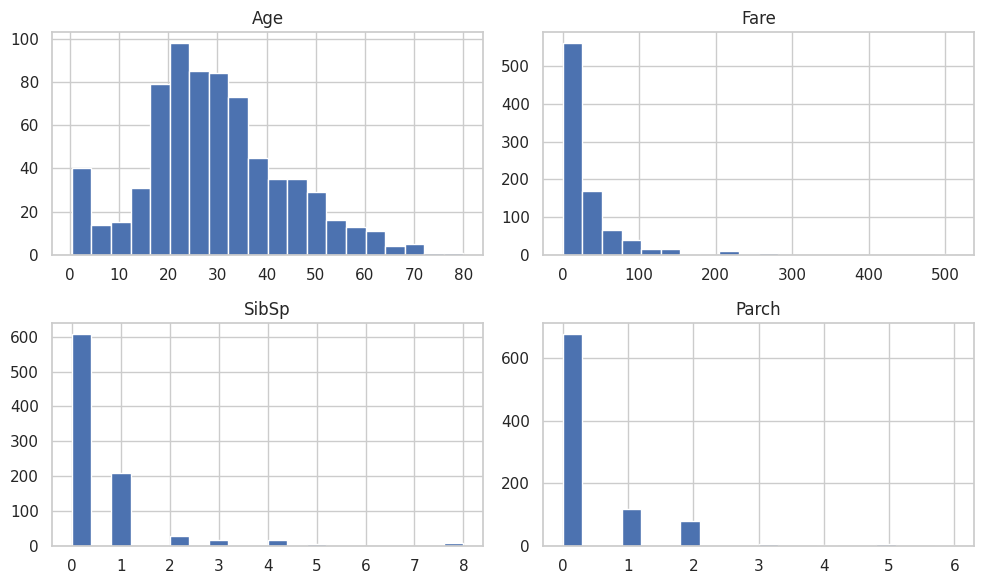

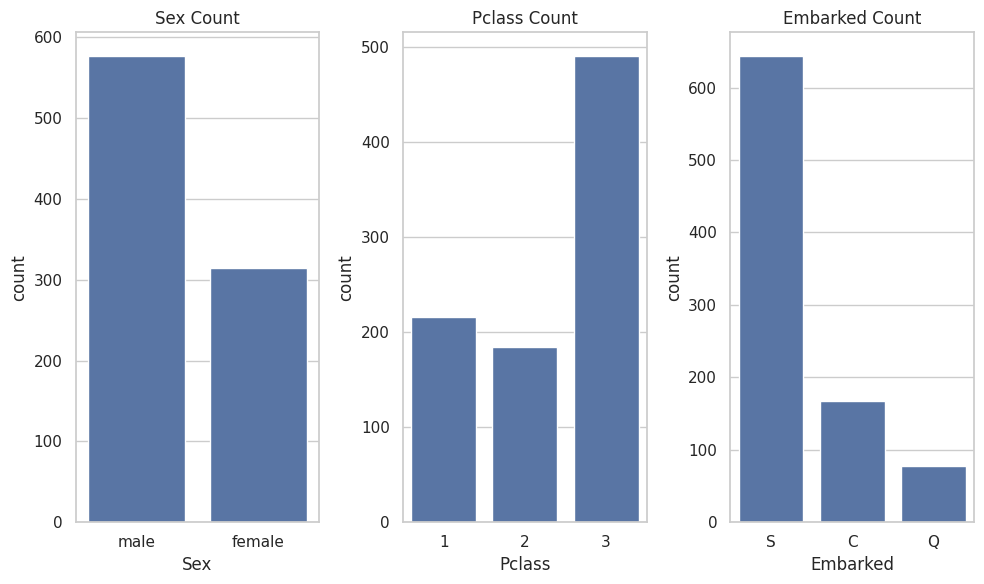

In [ ]:
# 2. Univariate Analysis

numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

# Histograms code is written for you
df[numeric_cols].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

# Write Countplots code for key categorical variables [You need to complete]
cat_cols = ["Sex", "Pclass", "Embarked"]

plt.figure(figsize=(10, 6))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f"{col} Count")
    plt.tight_layout()

plt.show()

#### Write Your insights
- Insight 1:Titanic passengers were mostly young adults traveling alone. Looking at the age chart, there's a big bump of people in their 20s and 30s. If you check the family charts (SibSp and Parch), the bars are tallest at zero. This tells a story—it seems a lot of people on this ship were single young men and women, maybe traveling to start a new life, not with their whole families in tow.
- Insight 2:The ticket prices tell a story of haves and have-nots. Most people paid a pretty cheap fare, crammed into the lower decks. But that Fare chart has a really long tail—a handful of people paid an absolute fortune, likely for the fancy suites. This split matches the passenger class breakdown perfectly: the ship was packed with third-class passengers, with far fewer in first and second.
- Insight 3:It was a ship of men leaving from Southampton. The passenger list wasn't balanced—for every woman onboard, there were about two men. And if you were getting on this ship, you were most likely stepping on in Southampton. It was the main starting point, with Cherbourg and Queenstown being much smaller stops to pick up the remaining passengers.

---
### 3. Bivariate Analysis with Target (15 marks)
Use `Survived` as the target variable.

**Tasks:**
- Compute and plot a **correlation heatmap** for numeric features, including `Survived`.
- Create a **pairplot** for: `Age`, `Fare`, `SibSp`, `Parch`, and `Survived`.
- Write **two to three insights**, including which variables seem associated with survival.



Correlation Heatmap of Numeric and Survival Features:



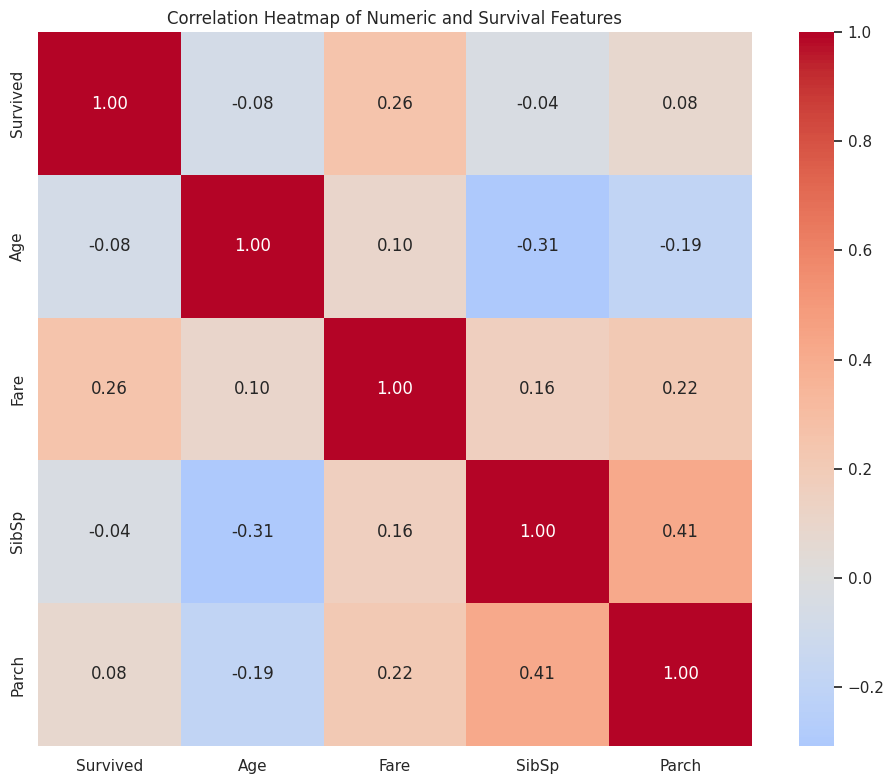


 Pairplot of Features Colored by Survival Status:



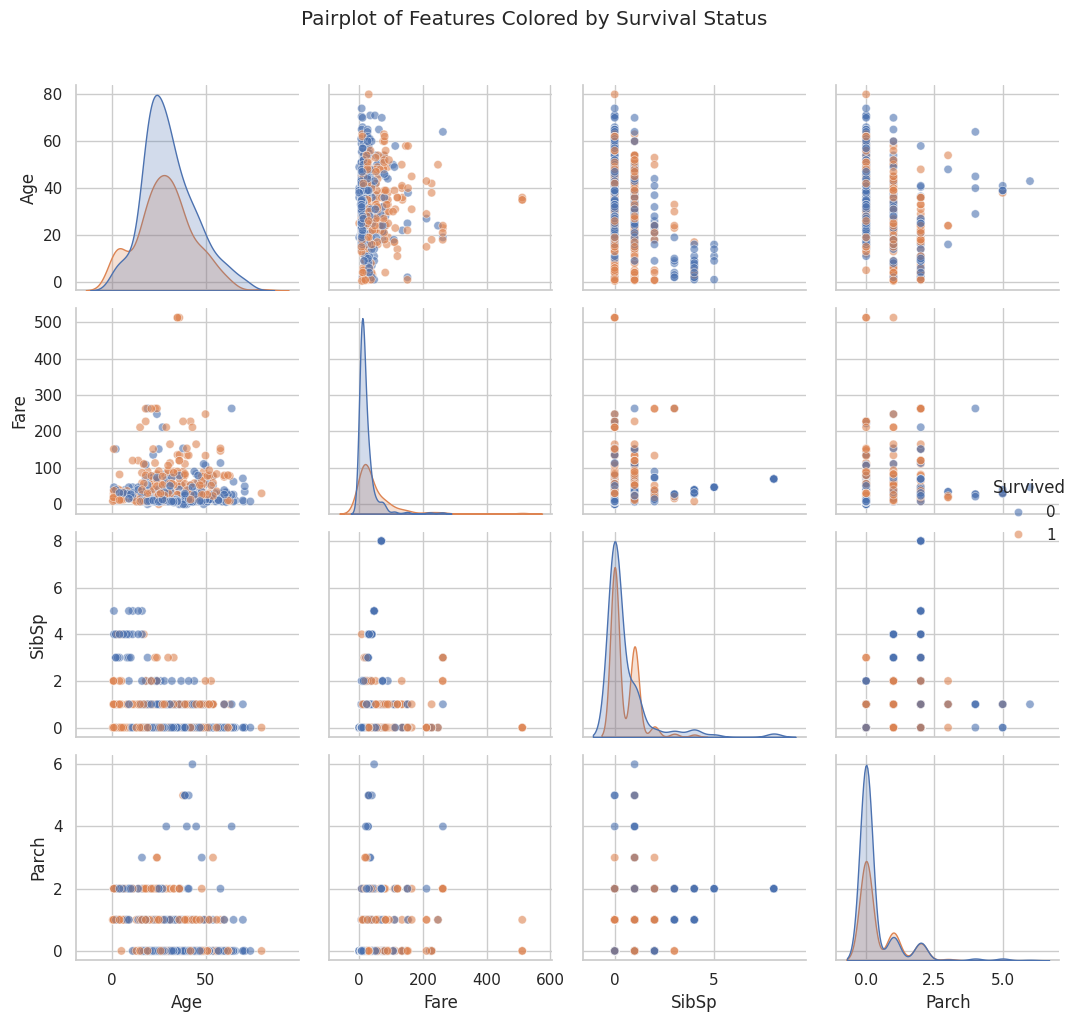

In [ ]:
# 3. Bivariate Analysis with Target

num_for_corr = ["Survived", "Age", "Fare", "SibSp", "Parch"]
## Complete this code block to generate correlation heatmap and pairplot [You need to complete]
plt.figure(figsize=(10, 8))
correlation_mat =  df[num_for_corr].corr()
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title("Correlation Heatmap of Numeric and Survival Features")
print("\nCorrelation Heatmap of Numeric and Survival Features:\n")
plt.tight_layout()
plt.show()
# pairplot ffor Age,Fare, SibSp , Parch and Survived
sns.pairplot(df, vars=["Age", "Fare", "SibSp", "Parch"], hue="Survived", diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Pairplot of Features Colored by Survival Status', y=1.02)
print("\n Pairplot of Features Colored by Survival Status:\n")
plt.tight_layout()
plt.show()

#### Your insights
- Insight 1: The ticket price was the biggest money-related clue. Looking at the heatmap, fare price (0.26) had the strongest positive connection to survival among these numbers. The pairplot shows a clear trend too—the blue dots (survivors) tend to bunch up more on the right side of the fare scale. It wasn't a guarantee, but if you paid top dollar for your ticket, your odds definitely went up.
- Insight 2: Having family nearby seemed to help, but being older didn't. Both SibSp (0.04) and Parch (0.08) had small positive numbers, suggesting traveling with siblings, spouses, or children gave a slight advantage—maybe families helped each other or were prioritized together. But Age had a negative number (-0.08), and looking at the pairplot, the blue and orange dots are all mixed up across different ages. So being older by itself wasn't what made someone less likely to survive among adults.
- Insight 3: No single number tells the whole story—it was complicated. The correlation numbers are all pretty small (under 0.3). The pairplot really drives this home—for every feature, there's a huge cloud of both blue and orange dots overlapping. This means that if you only knew someone's age, fare, or family size, you'd have a hard time guessing if they survived. The real answer probably involves a mix of things we haven't even looked at yet, like whether they were a woman or which deck their cabin was on.

---
### 4. Categorical vs Target Analysis (5 marks)
**Tasks:**
For each of the following categorical features: `Sex`, `Pclass`, `Embarked`:
- Plot a **bar chart** showing the proportion of passengers who survived in each category.
- Write **two short insights** about which categories have higher or lower survival chances.



Survival proportion by Sex:


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


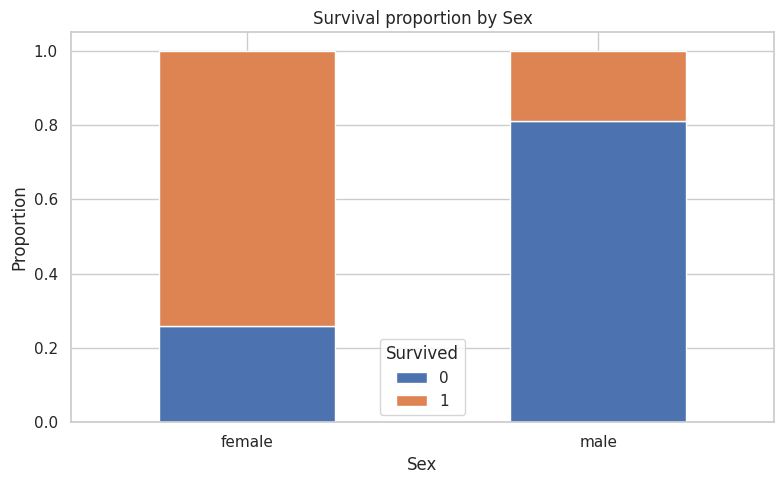


Survival proportion by Pclass:


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


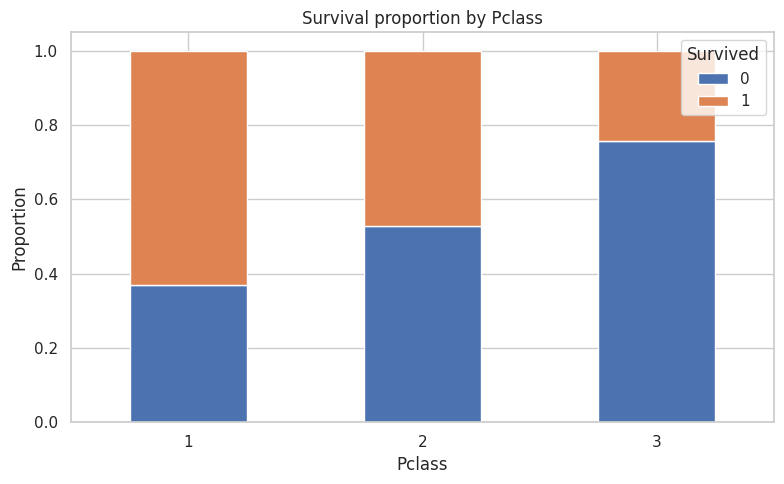


Survival proportion by Embarked:


Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


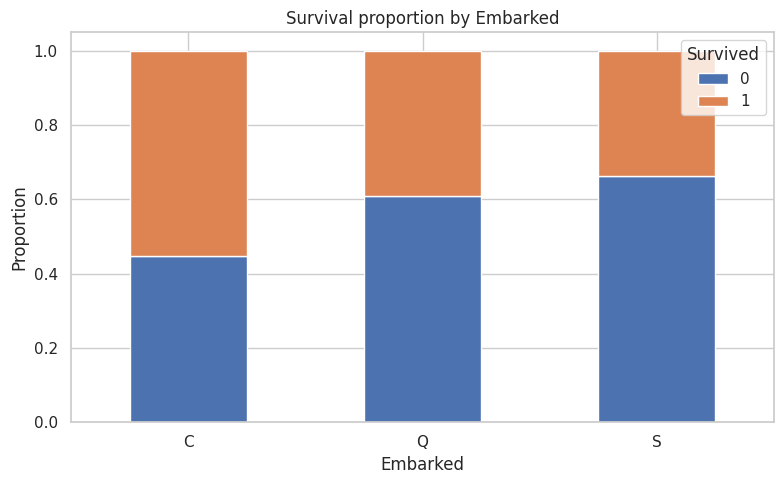

In [ ]:
# 4. Categorical vs Target Analysis [Bar chart code is written for you]

cat_target_cols = ["Sex", "Pclass", "Embarked"]

for c in cat_target_cols:
    ct = pd.crosstab(df[c], df["Survived"], normalize="index")
    print(f"\nSurvival proportion by {c}:")
    display(ct)
    ct.plot(kind="bar", stacked=True)
    plt.title(f"Survival proportion by {c}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

#### Your insights
- Insight 1: Gender was the biggest deciding factor by far. If you were a woman on the Titanic, you had about a 3 in 4 chance of surviving. If you were a man, you only had about a 1 in 5 chance. This "women and children first" policy really played out—it was the strongest predictor of who made it into the lifeboats.  
- Insight 2: First class wasn't just luxury—it was a survival ticket. Your passenger class made a huge difference: First class passengers survived at about twice the rate of second class and nearly triple the rate of third class. This shows that the people with the most expensive tickets also had the best access to lifeboats and safety information when things went wrong.

  

---
## Part B: Basic Data Preprocessing – 45 marks

Focus: **Handling missing values, encoding categorical variables, and scaling numeric features.**

### 5. Handling Missing Values (10 marks)
**Tasks:**
1. Show the count of missing values in each column.
2. Decide how to handle missing values for:
   - `Age` (numeric)
   - `Embarked` (categorical)
   - `Cabin` (many missing values)
3. Implement your chosen strategy in code.
4. Show missing value counts again to confirm.
5. Explain your choices in **3–4 sentences**.


In [ ]:
# 5. Handling Missing Values

print("Missing values before:") #[Task 1 is done for you]
print(df.isna().sum())

# Drop Cabin (Complete this code block)
df = df.drop(columns=["Cabin"])

# Fill Age (Complete this code block)
df["Age"] = df["Age"].fillna(df["Age"].median())

# Fill Embarked (Complete this code block)
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

print("\nMissing values after handling:")
print(df.isna().sum())

Missing values before:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#### Explanation of your strategy
- Why you dropped or kept `Cabin`:Cabin was dropped because it had too many missing values (687 out of 891), making it unreliable and not useful for predicting survival.
- Why you used median/mean for `Age`:The median was used for Age because it is robust to outliers and gives a better central value than the mean for skewed distributions.
- Why you used mode or another method for `Embarked`: Embarked was filled with the mode (most frequent value) because only 2 values were missing, and using the most common category preserves the data distribution without introducing bias.

---
### 6. Encoding Categorical Variables (15 marks)
Focus on the following categorical features:
- `Sex`
- `Embarked`
- `Pclass` (treat as categorical)

**Tasks:**
- Use `OneHotEncoder` from sklearn to encode these features.
- Keep `Survived` and the main numeric features (`Age`, `Fare`, `SibSp`, `Parch`).
- Show the shape and head of the encoded DataFrame.


In [ ]:
# 6. Encoding Categorical Variables

df_enc = df.copy()

# Select features for encoding and keep important numeric ones
cat_features = ["Sex", "Embarked", "Pclass"]
numeric_features = ["Age", "Fare", "SibSp", "Parch"]
target_col = "Survived"

# One hot encode categorical variables [You need to do]
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = encoder.fit_transform(df_enc[cat_features])
encoded_cols = encoder.get_feature_names_out(cat_features)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols)


# Build final encoded DataFrame
df_model = pd.concat([
    df_enc[[target_col] + numeric_features],
    encoded_df
], axis=1)

print("Shape after encoding:", df_model.shape)
display(df_model.head())

Shape after encoding: (891, 10)


,Survived,Age,Fare,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,7.2500,1,0,1.0,0.0,1.0,0.0,1.0
1,1,38.0,71.2833,1,0,0.0,0.0,0.0,0.0,0.0
2,1,26.0,7.9250,0,0,0.0,0.0,1.0,0.0,1.0
3,1,35.0,53.1000,1,0,0.0,0.0,1.0,0.0,0.0
4,0,35.0,8.0500,0,0,1.0,0.0,1.0,0.0,1.0


---
### 7. Scaling Numeric Features (15 marks)
**Tasks:**
- Use `StandardScaler` on the numeric features: `Age`, `Fare`, `SibSp`, `Parch`.
- Plot boxplots of these features **before** and **after** scaling.
- Write **two sentences** explaining how scaling changes the numeric values and why it is useful before training some ML models.


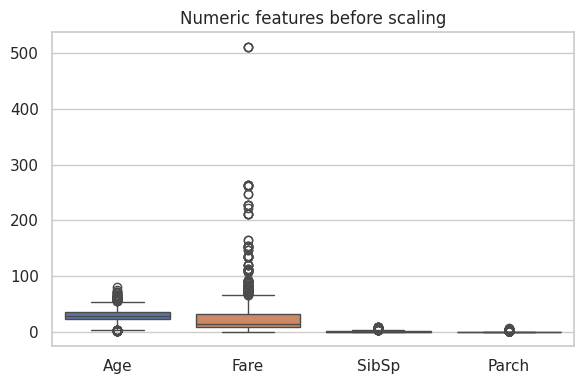

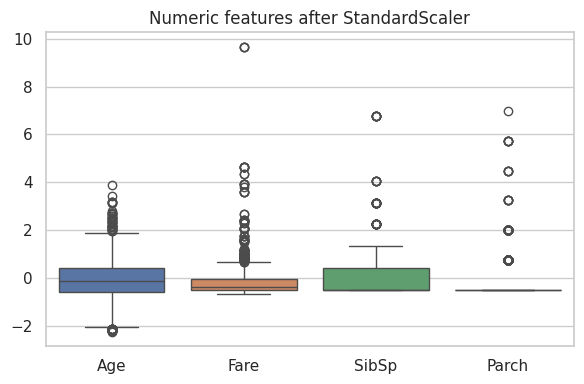

In [ ]:
# 7. Scaling Numeric Features

score_cols = ["Age", "Fare", "SibSp", "Parch"]

# Boxplot before scaling
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_model[score_cols])
plt.title("Numeric features before scaling")
plt.tight_layout()
plt.show()

# Apply StandardScaler [You need to do]
scaler = StandardScaler()
df_scaled = df_model.copy()
df_scaled[score_cols] = scaler.fit_transform(df_model[score_cols])

# Boxplot after scaling
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_scaled[score_cols])
plt.title("Numeric features after StandardScaler")
plt.tight_layout()
plt.show()

#### Your observations on scaling
- Sentence 1: Before scaling, the fare numbers were so huge they made the other features look tiny and squeezed—now everything sits in the same ballpark so you can actually compare them on the same graph.
- Sentence 2: This is important because many machine learning models would otherwise get "distracted" by the big fare numbers and treat them as more important, even if age or family size actually mattered just as much for survival.

---
### 8. Simple Feature Quality Check (5 marks)
**Tasks:**
- Show `.info()` of the final processed DataFrame (`df_scaled`).
- Confirm there are no missing values.
- Confirm that all remaining features are numeric and suitable for most ML models.
- Write **one short concluding remark** about dataset readiness.


In [ ]:
# 8. Simple Feature Quality Check
print(df_scaled.info())

print("\nTotal missing values in final DataFrame:", df_scaled.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   SibSp       891 non-null    float64
 4   Parch       891 non-null    float64
 5   Sex_male    891 non-null    float64
 6   Embarked_Q  891 non-null    float64
 7   Embarked_S  891 non-null    float64
 8   Pclass_2    891 non-null    float64
 9   Pclass_3    891 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 69.7 KB
None

Total missing values in final DataFrame: 0


#### Final remark on dataset readiness
- Your remark:The dataset is now fully cleaned, well-prepared features, zero missing values, and all numbers are properly scaled. And all the columns are in a suitable format for model traing that can predict who survived the Titanic.

---
## Submission
- Run all cells from top to bottom to make sure everything works.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.